# Python code to fit spectra (gaussian,Linear,quadratic and cubic)
## This code will read QSO spectra and try to fit the various emission profiles.
## Reference paper: Dong et al, Mon. Not. R. Astron. Soc. 383, 581-592 (2008)

### Date 15th March 2018

/tmp/ipykernel_6773/3276607057.py:61: RuntimeWarning: overflow encountered in exp
  return amp * exp(-(xo-cen)**2 /wid)+amp1 * exp(-(xo-cen1)**2 /wid1)


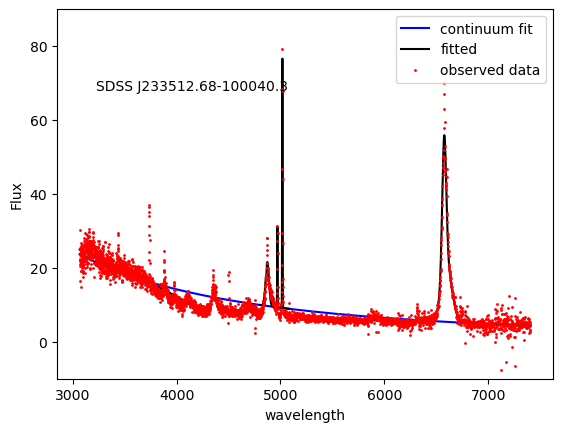

In [1]:

#=================================================================================
from numpy import sqrt, pi, exp, linspace
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt


#Reading the data
data=np.loadtxt('spec-0647-52553-0223.dat')
x=data[:,0]
y=data[:,1]
x=x/1.24

#Continuum fitting and subtraction
def func(x,a,b):
    return a*(x)**(-b)
optimizedParameters, pcov = opt.curve_fit(func, x,y)
plt.plot(x,func(x,*optimizedParameters),'b-',markersize=5, label = 'continuum fit')
k=func(x,*optimizedParameters)
for i in range (0,3833):
 y[i]=y[i]-k[i]

# H alpha curve fitting----------------------------------------------------------------------------------
plt.ylim(-10,90)
xha= data[3233:3833,0]
yha= data[3233:3833,1] 
xha=xha/1.24
def gaussian(xha, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xha-cen)**2 /wid)+amp1 * exp(-(xha-cen1)**2 /wid1)
init_vals = [273, 6563, 22, 214, 6563, 626]
popt,pcov = curve_fit(gaussian, xha, yha, p0=init_vals)
t=gaussian(xha,*popt) 
for i in range (3233,3833):
 t[i-3233]=t[i-3233]+k[i]
plt.plot(xha,t, 'k-',markersize=3, label='fitted') 
#plt.ylim(-10,550) 
#plt.plot(xha,gaussian(xha, *popt), 'k+', label='fitted')    # for [amp, cen, wid]

# quadratic eqn. curve fitting----------------------------------------------------------------------------------

q1= data[2196:3233,0]
q2= data[2196:3233,1] 
q1=q1/1.24
def agn(a,x,b,c):
    return a*x**2+b*x+c
init_vals = [273,5800,22]
popt,pcov = curve_fit(agn, q1, q2, p0=init_vals)
t1=agn(q1,*popt)
for i in range (2196,3233):
 t1[i-2196]=t1[i-2196]+k[i] 
plt.plot(q1,t1, 'k-',markersize=3) 
#plt.plot(q1,agn(q1, *popt), 'k+')   

# O III curve fitting------------------------------------------------------------------------------------------------------------

xo= data[2088:2196,0]
yo= data[2088:2196,1]
xo=xo/1.24
def gaussian(xo, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xo-cen)**2 /wid)+amp1 * exp(-(xo-cen1)**2 /wid1)
init_vals = [273, 4957, 22, 214, 5007, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xo, yo, p0=init_vals)
t2=gaussian(xo,*popt)
for i in range (2088,2196):
 t2[i-2088]=t2[i-2088]+k[i]
plt.plot(xo,t2,'k-',markersize=3) 
#plt.ylim(-10,550)
#plt.plot(xo, yo, 'b-', label='data')
#plt.plot(xo,gaussian(xo, *popt), 'k+')

#H beta curve fitting----------------------------------------------------------------------------------
xhb= data[1950:2088,0]
yhb= data[1950:2088,1]
xhb=xhb/1.24
def gaussian(xhb, amp, cen, wid,amp1,cen1,wid1):
    return amp * exp(-(xhb-cen)**2 /wid)+amp1 * exp(-(xhb-cen1)**2 /wid1)
init_vals = [273, 4862, 22, 214, 4862, 626]     # for [amp, cen, wid]
popt,pcov = curve_fit(gaussian, xhb, yhb, p0=init_vals)
t3=gaussian(xhb,*popt)
for i in range (1950,2088):
  t3[i-1950]=t3[i-1950]+k[i] 
plt.plot(xhb,t3,'k-',markersize=3)
#plt.ylim(-10,550)
#plt.plot(xhb,gaussian(xhb, *popt), 'k+')


# quadratic eqn. curve fitting----------------------------------------------------------------------------------

p1= data[1607:1943,0]
p2= data[1607:1943,1] 
p1=p1/1.24
def qso(a,x,b,c):
    return a*x**2+b*x+c
init_vals = [273,5800,22]
popt,pcov = curve_fit(qso, p1, p2, p0=init_vals)
t4=qso(p1,*popt)
for i in range (1607,1943):
 t4[i-1607]=t4[i-1607]+k[i]
#t4=t4-k[i]
plt.plot(p1,t4,'k-',markersize=3)
#plt.plot(p1,qso(p1, *popt), 'k+') 



#cubic-----------------------------------------------------------------------------------
x1= data[1:1455,0]
y1= data[1:1455,1]
x1=x1/1.24
def cubic(x1,a,b,c):
    return a*x1*x1*x1+b*x1*x1+c
init_vals = [273, 500, 22]     # for [amp, cen, wid]
popt,pcov = curve_fit(cubic, x1, y1, p0=init_vals)
t5=cubic(x1,*popt)
for i in range (1,1455):
  t5[i-1]=t5[i-1]+k[i]
plt.plot(x1,t5,'k-',markersize=3)
#plt.plot(x1,cubic(x1, *popt), 'k+')
for i in range (0,3833):
  y[i]=y[i]+ k[i]


plt.plot(x,y,'ro',markersize=1,label='observed data')
ax=plt.gca()
ax.annotate("SDSS J233512.68-100040.3",xy=(3223,68))
plt.xlabel('wavelength')
plt.ylabel('Flux')
plt.legend()
plt.show()


